# Evolutionary Algorithm Example
## Objective: Evolve a population of integer-encoded "words" until it matches a target word


In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Convert characters to integers (A=0, B=1, ..., Z=25, space=26)
def char_to_int(c):
    if c == " ":
        return 26
    return ord(c.upper()) - 65

def int_to_char(i):
    if i == 26:
        return " "
    return chr(i + 65)

def word_to_ints(word):
    return [char_to_int(c) for c in word]

def ints_to_word(ints):
    return "".join([int_to_char(i) for i in ints])

In [3]:
# ==============================
# Fitness function
# ==============================
def fitness(individual, target):
    """
    Fitness = percentage of correct letters compared to target.
    """
    correct = sum([1 for i, t in zip(individual, target) if i == t])
    return correct / len(target)

In [4]:
# ==============================
# Selection
# ==============================
def tournament_selection(population, fitnesses, k=3):
    """
    Tournament selection: pick 'k' random individuals, 
    return the best one.
    """
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1], reverse=True)  # sort by fitness
    return selected[0][0]

# Roulette selection (commented, alternative approach)
"""
def roulette_selection(population, fitnesses):
    total_fit = sum(fitnesses)
    pick = random.uniform(0, total_fit)
    current = 0
    for ind, fit in zip(population, fitnesses):
        current += fit
        if current > pick:
            return ind
"""

'\ndef roulette_selection(population, fitnesses):\n    total_fit = sum(fitnesses)\n    pick = random.uniform(0, total_fit)\n    current = 0\n    for ind, fit in zip(population, fitnesses):\n        current += fit\n        if current > pick:\n            return ind\n'

In [5]:
# ==============================
# Crossover
# ==============================
def one_point_crossover(parent1, parent2):
    """
    One-point crossover: split at random point and combine.
    """
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Alternative crossover (commented): uniform crossover
def uniform_crossover(parent1, parent2):
    child1, child2 = [], []
    for g1, g2 in zip(parent1, parent2):
        if random.random() < 0.5:
            child1.append(g1)
            child2.append(g2)
        else:
            child1.append(g2)
            child2.append(g1)
    return child1, child2

In [6]:
# ==============================
# Mutation
# ==============================
def mutate(individual, mutation_rate=0.1):
    """
    Mutation operator.
    Two variants: 
    - Add 1 (mod 27) to current number
    - Replace with random number (commented)
    """
    new_ind = []
    for gene in individual:
        if random.random() < mutation_rate:
            # Version 1: Add 1
            new_ind.append((gene + 1) % 27)

            # Version 2: random number (commented)
            # new_ind.append(random.randint(0, 26))
        else:
            new_ind.append(gene)
    return new_ind

In [7]:
# ==============================
# Evolutionary Algorithm
# ==============================
def evolve(target_word, pop_size=100, generations=200, mutation_rate=0.05):
    target = word_to_ints(target_word)
    word_length = len(target)

    # Initialize population randomly
    population = [[random.randint(0, 26) for _ in range(word_length)] for _ in range(pop_size)]

    avg_fit_history = []
    best_fit_history = []
    best_word_history = []

    for gen in range(generations):
        # Calculate fitness for population
        fitnesses = [fitness(ind, target) for ind in population]

        # Track stats
        avg_fit = sum(fitnesses) / pop_size
        best_fit = max(fitnesses)
        best_ind = population[fitnesses.index(best_fit)]
        avg_fit_history.append(avg_fit)
        best_fit_history.append(best_fit)
        best_word_history.append(ints_to_word(best_ind))

        print(f"Gen {gen}: Best='{ints_to_word(best_ind)}' Fit={best_fit:.2f} AvgFit={avg_fit:.2f}")

        # Check for success
        if best_fit == 1.0:
            print("Target word reached!")
            break

        # New population
        new_population = []
        while len(new_population) < pop_size:
            # Select parents
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)

            # Crossover
            child1, child2 = one_point_crossover(parent1, parent2)
            # child1, child2 = uniform_crossover(parent1, parent2)
            # Alternative crossover: uniform_crossover (commented)

            # Mutation
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            new_population.append(child1)
            if len(new_population) < pop_size:
                new_population.append(child2)

        population = new_population

    return avg_fit_history, best_fit_history, best_word_history

Gen 0: Best='CQWP AZWMQLJRNSO' Fit=0.19 AvgFit=0.03
Gen 1: Best='POBPKHLFYDQYODKK' Fit=0.19 AvgFit=0.07
Gen 2: Best='CVBPS EQDCATMQ Z' Fit=0.25 AvgFit=0.11
Gen 3: Best='CVAPS EQDDAVTTNE' Fit=0.31 AvgFit=0.15
Gen 4: Best='CVMPUWEWIJNWSILO' Fit=0.44 AvgFit=0.18
Gen 5: Best='CVMPUWEWIIXYALBO' Fit=0.44 AvgFit=0.24
Gen 6: Best='CVMPUWEWJIXYAMBO' Fit=0.44 AvgFit=0.28
Gen 7: Best='CVMPUWEWJIXYSILO' Fit=0.50 AvgFit=0.31
Gen 8: Best='CVMPUWEEXXAYQVNM' Fit=0.50 AvgFit=0.33
Gen 9: Best='CVMPUWEEXXAYQVNO' Fit=0.56 AvgFit=0.34
Gen 10: Best='CBMPUXEWIIYYSINO' Fit=0.56 AvgFit=0.36
Gen 11: Best='CVMPUTEELTLXSINO' Fit=0.56 AvgFit=0.39
Gen 12: Best='CVMPUTEXICAYQWNO' Fit=0.62 AvgFit=0.41
Gen 13: Best='CWMPUWEELYAYSHNO' Fit=0.62 AvgFit=0.44
Gen 14: Best='CWMPUTFRLZAYSHNO' Fit=0.69 AvgFit=0.47
Gen 15: Best='CVMPUXERLZAYSHNO' Fit=0.69 AvgFit=0.50
Gen 16: Best='CVMPUTERLZAYSHNO' Fit=0.75 AvgFit=0.52
Gen 17: Best='CXMPUTEDJYAYSHNO' Fit=0.69 AvgFit=0.53
Gen 18: Best='CXMQUTERFGAYSXNO' Fit=0.69 AvgFit=0.53
Gen

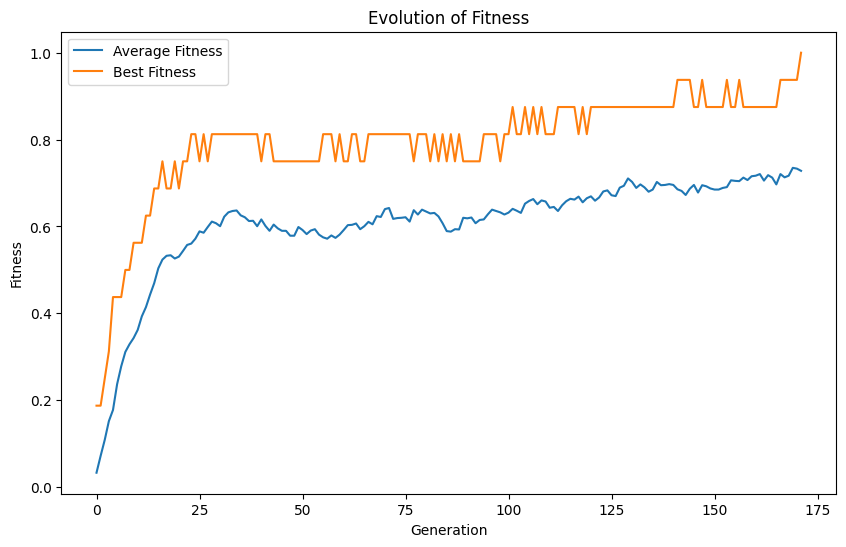

In [11]:
# ==============================
# Run and visualize
# ==============================
target_word = "COMPUTER SAYS NO"
avg_fit, best_fit, best_word = evolve(target_word, pop_size=100, generations=300, mutation_rate=0.1)

# Plot average and best fitness
plt.figure(figsize=(10,6))
plt.plot(avg_fit, label="Average Fitness")
plt.plot(best_fit, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of Fitness")
plt.legend()
plt.show()